In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from skimage.feature import canny
import Placer as Pl

Покажем визуализацию работы алгоритма на примере фотографии test19.jpg

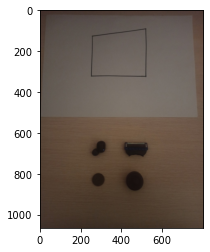

In [4]:
photo = cv2.imread('data/test19.jpg')
plt.imshow(cv2.cvtColor(photo, cv2.COLOR_BGR2RGB))

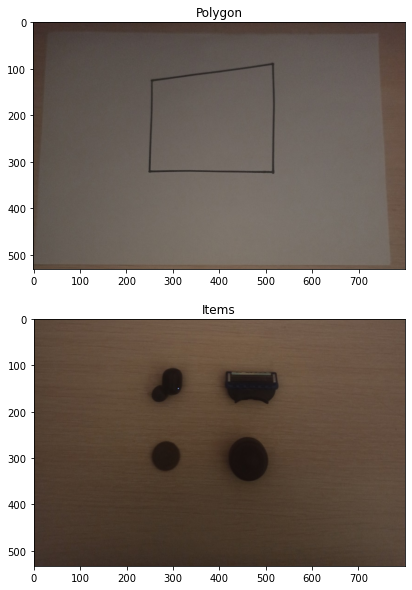

In [9]:
# константы для разбиения фотографий на две половины (используются фотографии размером 1065х800)
midline = 532
height = 1065
width = 800

polygon = photo[0:midline, 0:width]
items = photo[midline:height, 0:width]
fig, ax = plt.subplots(2, figsize=(15, 10))

ax[0].set_title('Polygon')
ax[0].imshow(cv2.cvtColor(polygon, cv2.COLOR_BGR2RGB))
    
ax[1].set_title('Items')
ax[1].imshow(cv2.cvtColor(items, cv2.COLOR_BGR2RGB))

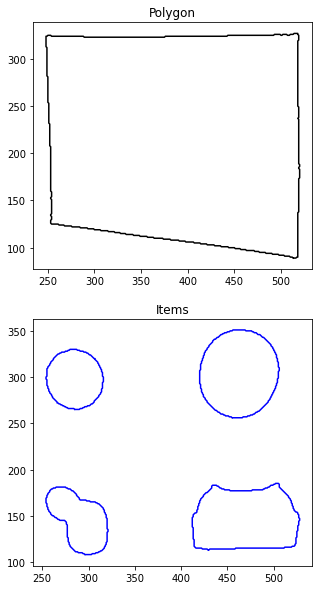

In [15]:
poly_contour = Pl.get_contour_polygon(polygon)
items_contours = Pl.get_contours_items(items)
fig, ax = plt.subplots(2, figsize=(5, 10))

ax[0].set_title('Polygon')
ax[0].plot(poly_contour[:, 0][:, 0], poly_contour[:, 0][:, 1], color='black')
    
ax[1].set_title('Items')
for c in items_contours:
    ax[1].plot(c[:, 0][:, 0], c[:, 0][:, 1], color='blue')

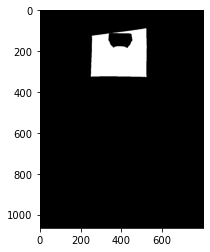

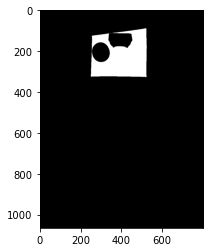

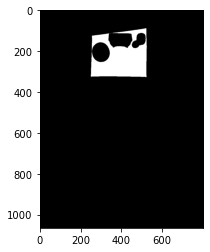

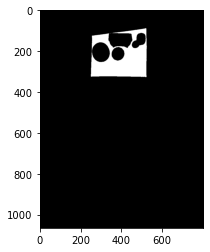

In [16]:
size = (height, width)
result = Pl.placing(size, items_contours, poly_contour)